In [38]:
import pandas as pd
import seaborn as sns
from os import listdir
import numpy as np
from matplotlib.pyplot import figure

In [3]:
# open floating point file [gnp]
floating_cnv_err = []
with open("./datasets/gnp/floating_cnv_err.nst") as f: 
    text = f.read().split('\n')
    text = text[1:]
    parsed_float = map(lambda x: x[1:-1].split(','), text)
    

In [4]:
# open fixed point file [gnp]
fixed_cnv_err = []
with open("./datasets/gnp/fixed_cnv_err.nst") as f: 
    text = f.read().split('\n')
    text = text[1:]
    parsed_fixed = map(lambda x: x[1:-1].split(','), text)
    

In [5]:
for el in list(parsed_float)[:-1]: 
    floating_cnv_err.append(float(el[1]))
for el in list(parsed_fixed)[:-1]:
    if int(el[1]) != 0: 
        fixed_cnv_err.append(float(int(el[1]) / (1 << 62)))


[None,
 Text(0, 0.5, 'convergence error [log]'),
 Text(0.5, 0, 'iterations [floating-point]')]

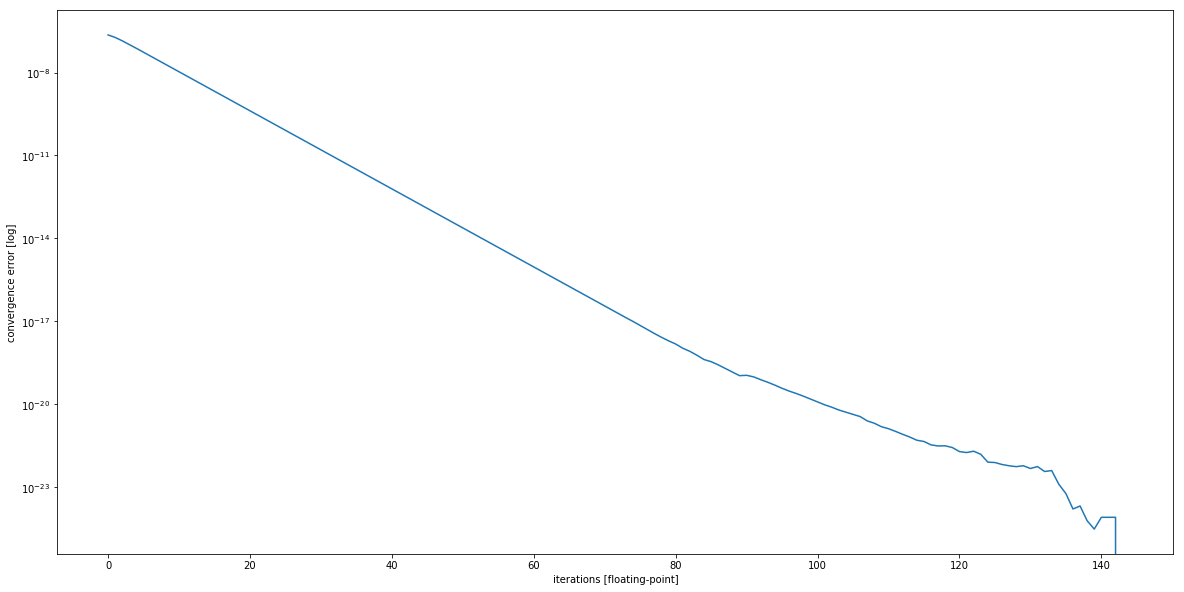

In [6]:
figure(figsize=(20, 10))
ax = sns.lineplot(x = list(range(len(floating_cnv_err))), y = floating_cnv_err)
ax.set(yscale="log", ylabel = "convergence error [log]", xlabel = "iterations [floating-point]")


[None,
 Text(0, 0.5, 'convergence error [log]'),
 Text(0.5, 0, 'iterations [fixed-point]')]

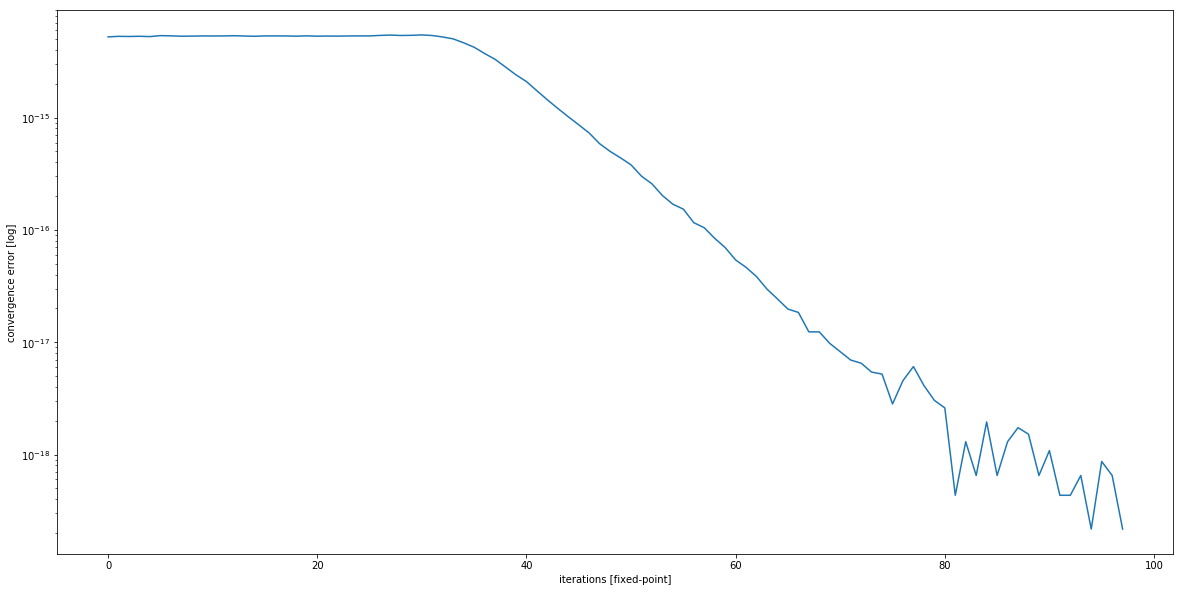

In [7]:
figure(figsize=(20, 10))
ax = sns.lineplot(x=list(range(len(fixed_cnv_err))), y=fixed_cnv_err)
ax.set(yscale="log", xlabel="iterations [fixed-point]", ylabel = "convergence error [log]")

In [12]:
# open floating point file [scf]
floating_cnv_err = []
with open("./datasets/scf/floating_cnv_err.nst") as f: 
    text = f.read().split('\n')
    text = text[1:]
    parsed_float = map(lambda x: x[1:-1].split(','), text)
    

In [13]:
for el in list(parsed_float)[:-1]: 
    floating_cnv_err.append(float(el[1]))

[None,
 Text(0, 0.5, 'convergence error [log]'),
 Text(0.5, 0, 'iterations [floating-point]')]

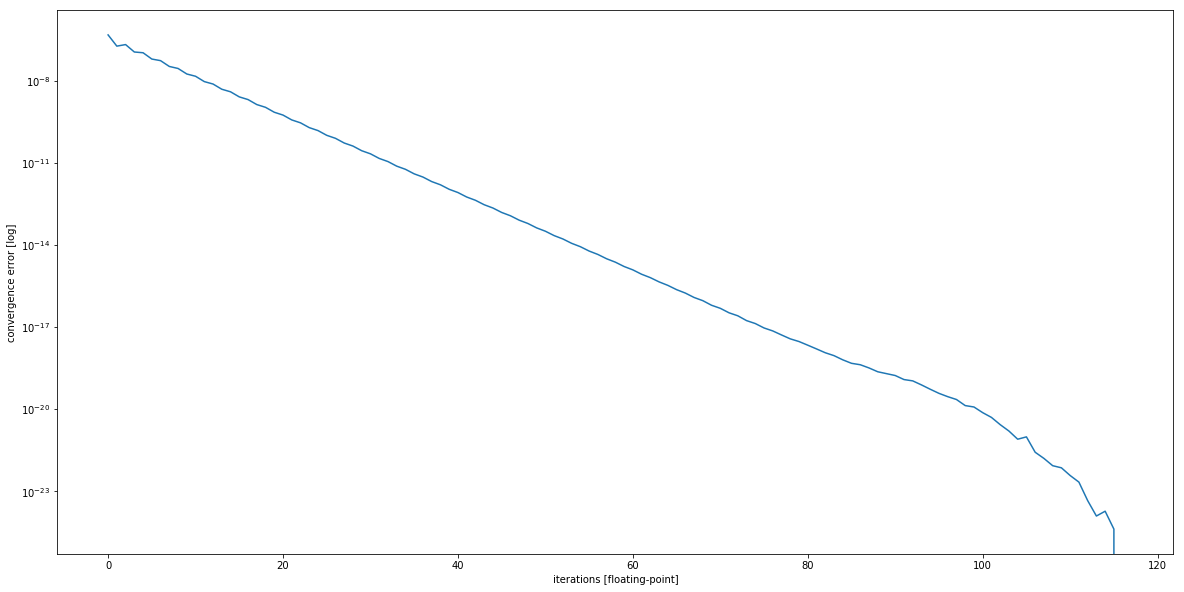

In [15]:
figure(figsize=(20, 10))
ax = sns.lineplot(x = list(range(len(floating_cnv_err))), y = floating_cnv_err)
ax.set(yscale="log", ylabel = "convergence error [log]", xlabel = "iterations [floating-point]")

# Convergence error

In [39]:
graph_types = ["scf", "gnp", "smw"]
algo_types  = ["fixed", "floating"]

measurements = pd.DataFrame()

for g in graph_types: 
    if g != "smw": 
        for a in algo_types: 
            csvs = [f"../new_ds/measurement/{g}/{a}/{filename}" for filename in listdir(f"../new_ds/measurement/{g}/{a}") if '.csv' in filename ]
            temp = pd.DataFrame()
            for el in csvs: 
                temp = pd.read_csv(el)
                temp["algo"] = a
                temp["graph"] = g
                measurements = measurements.append(temp, ignore_index=True)

In [73]:
measurements = measurements[~(measurements["Type"] == np.nan)]
measurements["Name"] = measurements["Name"].astype(str).apply(lambda x: "spmv" if "spmv" in x else x)
#measurements["Time"] = measurements["Time"].astype(np.float)
measurements["Time"] = measurements[measurements["Time"] != 'ms']["Time"].astype(np.float)

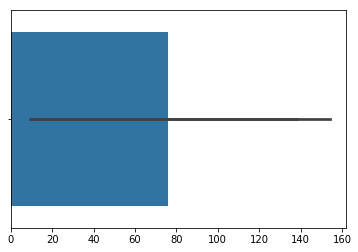

In [79]:
for a in algo_types: 
    temp = measurements[measurements["algo"] == a]
    temp = temp[temp["Name"] == "spmv"]
    
    sns.barplot(temp.groupby("graph").mean())